In [ ]:
import pandas as pd

non = pd.read_csv("/Users/christopherhsu/Desktop/projects/swing analysis/data/twostrikes-bat-tracking-swing-path.csv")
two = pd.read_csv("/Users/christopherhsu/Desktop/projects/swing analysis/data/nontwostrikes-bat-tracking-swing-path.csv")
data2025 = pd.read_csv("/Users/christopherhsu/Desktop/projects/swing analysis/data/data_2025")

In [8]:
import pandas as pd

swing_merged = non.merge(
    two,
    on=["id", "name", "side"],
    suffixes=("_non", "_two")
)

swing_merged["delta_attack_angle"] = (
    swing_merged["attack_angle_two"] - swing_merged["attack_angle_non"]
)
swing_merged["delta_bat_speed"] = (
    swing_merged["avg_bat_speed_two"] - swing_merged["avg_bat_speed_non"]
)
swing_merged["delta_swing_tilt"] = (
    swing_merged["swing_tilt_two"] - swing_merged["swing_tilt_non"]
)
swing_merged["delta_attack_direction"] = (
    swing_merged["attack_direction_two"] - swing_merged["attack_direction_non"]
)

swing_merged[["name", "delta_attack_angle", "delta_bat_speed", "delta_swing_tilt", "delta_attack_direction"]].head()


,name,delta_attack_angle,delta_bat_speed,delta_swing_tilt,delta_attack_direction
0,"Caminero, Junior",0.265667,1.407420,0.133144,0.063380
1,"Cruz, Oneil",1.927582,2.671433,-0.098548,-1.125978
2,"Schwarber, Kyle",0.192446,0.901673,0.781471,0.355824
3,"Judge, Aaron",1.499869,1.142154,0.718347,-1.157578
4,"Adell, Jo",1.432437,1.550081,0.516675,-0.910245


In [9]:
swing_merged["swings_non"] = swing_merged["competitive_swings_non"]
swing_merged["swings_two"] = swing_merged["competitive_swings_two"]

In [11]:
league_means = {
    "attack_angle_non": swing_merged["attack_angle_non"].mean(),
    "attack_angle_two": swing_merged["attack_angle_two"].mean(),
    "avg_bat_speed_non": swing_merged["avg_bat_speed_non"].mean(),
    "avg_bat_speed_two": swing_merged["avg_bat_speed_two"].mean(),
    "swing_tilt_non": swing_merged["swing_tilt_non"].mean(),
    "swing_tilt_two": swing_merged["swing_tilt_two"].mean(),
    "attack_direction_non": swing_merged["attack_direction_non"].mean(),
    "attack_direction_two": swing_merged["attack_direction_two"].mean()
}

print("League-wide swing metrics:")
for k, v in league_means.items():
    print(f"{k}: {v:.2f}")


League-wide swing metrics:
attack_angle_non: 9.49
attack_angle_two: 10.47
avg_bat_speed_non: 71.08
avg_bat_speed_two: 72.55
swing_tilt_non: 32.04
swing_tilt_two: 32.63
attack_direction_non: -1.28
attack_direction_two: -2.18


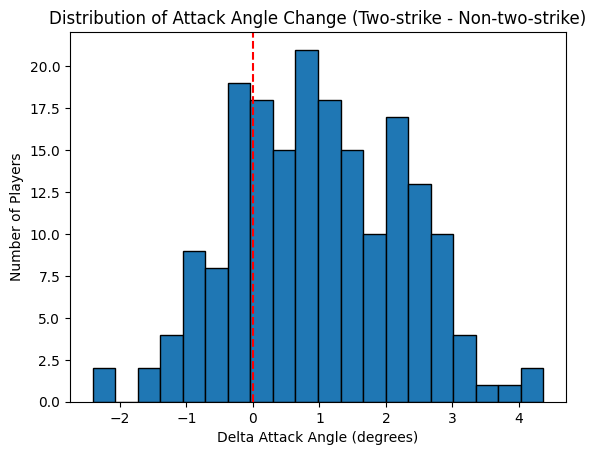

In [12]:
import matplotlib.pyplot as plt

plt.hist(swing_merged["delta_attack_angle"], bins=20, edgecolor="black")
plt.axvline(0, color="red", linestyle="--")
plt.title("Distribution of Attack Angle Change (Two-strike - Non-two-strike)")
plt.xlabel("Delta Attack Angle (degrees)")
plt.ylabel("Number of Players")
plt.show()


In [14]:
import numpy as np

attack_angle_thresh = 3.0
bat_speed_thresh = 1.5

swing_merged["changer_flag"] = np.where(
    (swing_merged["delta_attack_angle"].abs() > attack_angle_thresh) |
    (swing_merged["delta_bat_speed"].abs() > bat_speed_thresh),
    "changer",
    "steady"
)

print(swing_merged["changer_flag"].value_counts())


changer_flag
steady     102
changer     87
Name: count, dtype: int64


In [15]:
group_means = (
    swing_merged.groupby("changer_flag")[[
        "attack_angle_non", "attack_angle_two", "delta_attack_angle",
        "avg_bat_speed_non", "avg_bat_speed_two", "delta_bat_speed",
        "swing_tilt_non", "swing_tilt_two", "delta_swing_tilt"
    ]]
    .mean()
    .round(2)
)

print(group_means)


              attack_angle_non  attack_angle_two  delta_attack_angle  \
changer_flag                                                           
changer                   8.61             10.21                1.60   
steady                   10.23             10.70                0.46   

              avg_bat_speed_non  avg_bat_speed_two  delta_bat_speed  \
changer_flag                                                          
changer                   70.33              72.35             2.02   
steady                    71.73              72.72             0.99   

              swing_tilt_non  swing_tilt_two  delta_swing_tilt  
changer_flag                                                    
changer                32.25           32.68              0.43  
steady                 31.85           32.58              0.73  


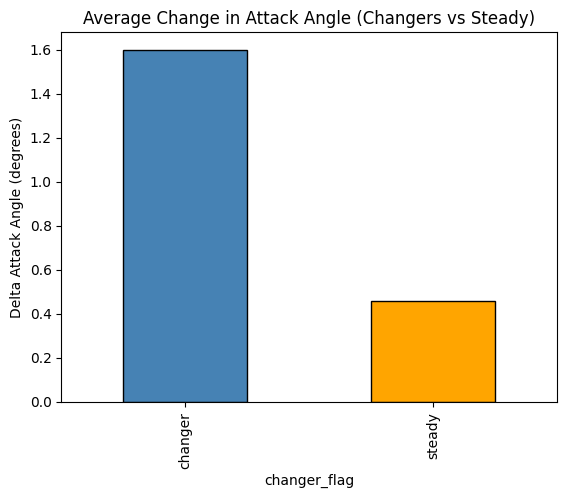

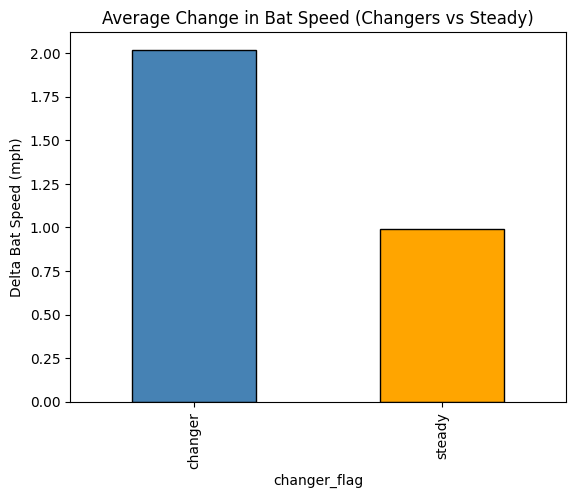

In [ ]:
import matplotlib.pyplot as plt

group_means["delta_attack_angle"].plot(kind="bar", color=["steelblue", "orange"], edgecolor="black")
plt.title("Average Change in Attack Angle (Changers vs Steady)")
plt.ylabel("Delta Attack Angle (degrees)")
plt.show()

group_means["delta_bat_speed"].plot(kind="bar", color=["steelblue", "orange"], edgecolor="black")
plt.title("Average Change in Bat Speed (Changers vs Steady)")
plt.ylabel("Delta Bat Speed (mph)")
plt.show()
